In [1]:
import pandas as pd

# Assignment 1: Date Formats and Date Parts

* First, convert the `date` column to datetime64, by any method.

* Then, create a column representing the time difference between the last date in the data and each date. 

* Next, create columns for the date parts year, month, and weekday.

* Finally, format the date to Year-Month-Day (This will be a string/object).

In [2]:
# read in transactions.csv 
transactions = pd.read_csv('../retail/transactions.csv')
transactions.head(5)

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [3]:
transactions['date'] = pd.to_datetime(transactions['date'])

In [4]:
transactions = transactions.assign(differences = lambda x: transactions['date'].iloc[-1] - transactions['date'])

In [5]:
transactions = transactions.assign(year = lambda x: x['date'].dt.year, 
                    month = lambda x: x['date'].dt.month,
                    weekday = lambda x: x['date'].dt.weekday)

In [6]:
transactions = transactions.assign(new_date=lambda x: x['year'].astype(str) + '-' + x['month'].astype(str) + '-' + x['weekday'].astype(str))


In [7]:
transactions


,date,store_nbr,transactions,differences,year,month,weekday,new_date
0,2013-01-01,25,770,1687 days,2013,1,1,2013-1-1
1,2013-01-02,1,2111,1686 days,2013,1,2,2013-1-2
2,2013-01-02,2,2358,1686 days,2013,1,2,2013-1-2
3,2013-01-02,3,3487,1686 days,2013,1,2,2013-1-2
4,2013-01-02,4,1922,1686 days,2013,1,2,2013-1-2
...,...,...,...,...,...,...,...,...
83483,2017-08-15,50,2804,0 days,2017,8,1,2017-8-1
83484,2017-08-15,51,1573,0 days,2017,8,1,2017-8-1
83485,2017-08-15,52,2255,0 days,2017,8,1,2017-8-1
83486,2017-08-15,53,932,0 days,2017,8,1,2017-8-1


# Assignment 2: Time Arithmetic


Hi again,

I just got word the the true max date in our data was three weeks after 2017-08-15.

* Can you add three weeks to the ‘time_to_last_date’ column? 
* Then, calculate ‘weeks_to_last_date’ by dividing the number of days  in ‘time_to_last_date’ by 7.

Thanks

In [8]:
# overwrite previous transactions df and convert date column

transactions = pd.read_csv("../retail/transactions.csv", parse_dates=["date"])

In [9]:
transactions.tail()

,date,store_nbr,transactions
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932
83487,2017-08-15,54,802


In [10]:
# recreate columns from assignment 1 using assign

transactions = transactions.assign(
    year=transactions["date"].dt.year,
    month=transactions["date"].dt.month,
    day_of_week=transactions["date"].dt.dayofweek,
    time_to_last_date=transactions["date"].max() - transactions["date"],
)

transactions.head()

,date,store_nbr,transactions,year,month,day_of_week,time_to_last_date
0,2013-01-01,25,770,2013,1,1,1687 days
1,2013-01-02,1,2111,2013,1,2,1686 days
2,2013-01-02,2,2358,2013,1,2,1686 days
3,2013-01-02,3,3487,2013,1,2,1686 days
4,2013-01-02,4,1922,2013,1,2,1686 days


In [11]:
transactions['time_to_last_date'] = transactions['time_to_last_date'].dt.days + 21


In [12]:
transactions = transactions.assign(week_to_last_week = transactions['time_to_last_date'] / 7)
transactions

,date,store_nbr,transactions,year,month,day_of_week,time_to_last_date,week_to_last_week
0,2013-01-01,25,770,2013,1,1,1708,244.000000
1,2013-01-02,1,2111,2013,1,2,1707,243.857143
2,2013-01-02,2,2358,2013,1,2,1707,243.857143
3,2013-01-02,3,3487,2013,1,2,1707,243.857143
4,2013-01-02,4,1922,2013,1,2,1707,243.857143
...,...,...,...,...,...,...,...,...
83483,2017-08-15,50,2804,2017,8,1,21,3.000000
83484,2017-08-15,51,1573,2017,8,1,21,3.000000
83485,2017-08-15,52,2255,2017,8,1,21,3.000000
83486,2017-08-15,53,932,2017,8,1,21,3.000000


# Assignment 3: Missing Time Series Data

Take a look at the mean value for the oil price using forward fill, backfill, and interpolation. Are they very different?

Then, plot the series with forward fill for:
 * The year 2014.
 * The month of December 2014.
 * The days from December 1st to December 15th, 2014.


In [13]:
# Read in oil csv with date as index (and converted to datetime64)
oil = pd.read_csv("../retail/oil.csv", 
                  index_col="date", 
                  parse_dates=True)

In [14]:
# This is a synonym for datetime64

oil.index.dtype

dtype('<M8[ns]')

In [15]:
# mean of original series

oil.mean()

dcoilwtico    67.714366
dtype: float64

<Axes: xlabel='date'>

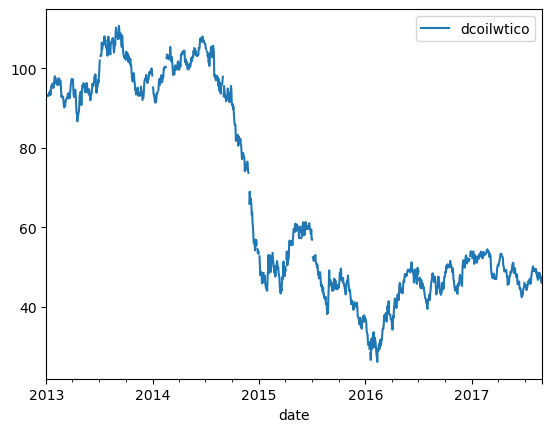

In [16]:
# original plot

oil.plot()

In [29]:
oil = oil.ffill().mean()

dcoilwtico    67.671249
dtype: float64

In [30]:
oil.bfill().mean()

dcoilwtico    67.673325
dtype: float64

In [33]:
oil.astype('float64').interpolate().mean()

dcoilwtico    67.661824
dtype: float64

<Axes: xlabel='date'>

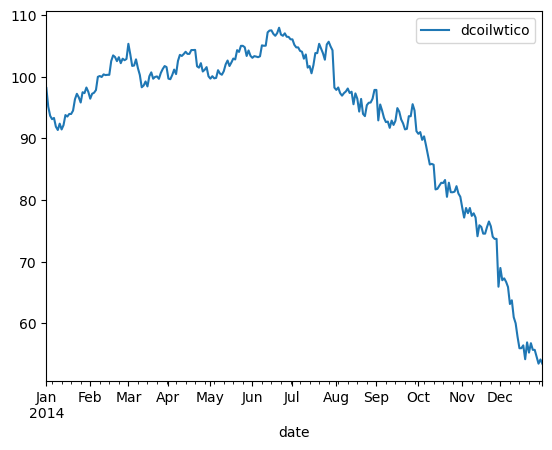

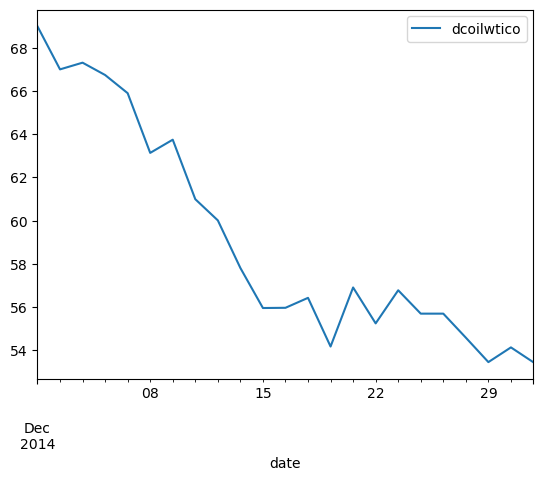

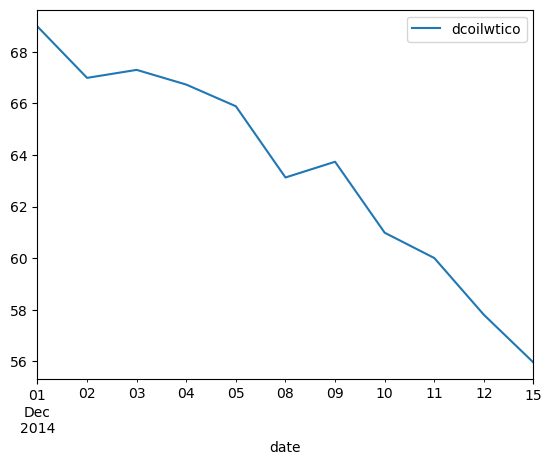

In [35]:
oil.loc['2014'].plot()
oil.loc['2014-12'].plot()
oil.loc['2014-12':'2014-12-15'].plot()

# Assignment 4: Shift and Diff

Hello,
I’m looking into a few different year over year trends related to changes made at store 47.

Can you plot the sum of monthly of transactions in year 2015 vs the sum of monthly transactions in the year prior for store 47?

Make sure to group your DataFrame by year AND month!

Thanks

In [37]:
transactions.head(5)

,date,store_nbr,transactions,year,month,day_of_week,time_to_last_date,week_to_last_week
0,2013-01-01,25,770,2013,1,1,1708,244.000000
1,2013-01-02,1,2111,2013,1,2,1707,243.857143
2,2013-01-02,2,2358,2013,1,2,1707,243.857143
3,2013-01-02,3,3487,2013,1,2,1707,243.857143
4,2013-01-02,4,1922,2013,1,2,1707,243.857143


In [68]:
grouped = (
    transactions.query(
    'store_nbr.isin([47]) and year.isin([2015,2014])')
    .groupby(["store_nbr","year", "month"])
    .agg({"transactions": ["sum"]})
)
pivot = grouped.pivot_table(index = 'month', 
                         columns = 'year', 
                         values = 'transactions', 
                                )
pivot.plot().legend(['year_prior', 'transactions'])

transactions
                              sum
store_nbr year month             
47        2014 1           114190
               2           107175
               3           121771
               4           122976
               5           126298

C:\Users\bangg\AppData\Local\Temp\ipykernel_11364\1497011324.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  transactions_47 = transactions_47.groupby([transactions_47['date'].dt.year, transactions_47['date'].dt.month]).sum()


<Axes: xlabel='date'>

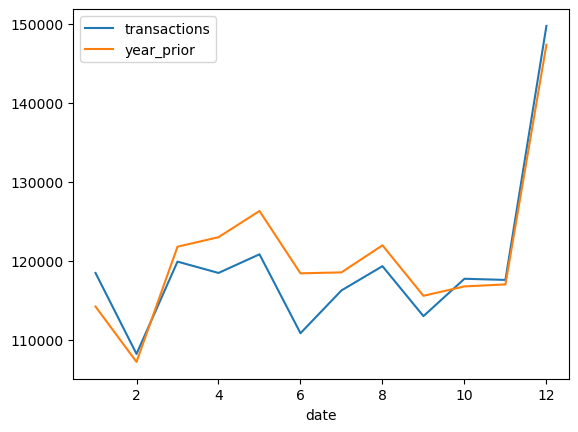

In [81]:
transactions_47 = transactions.loc[transactions['store_nbr'] == 47, ['date', 'transactions']]
transactions_47 = transactions_47.groupby([transactions_47['date'].dt.year, transactions_47['date'].dt.month]).sum()
transactions_47['year_prior'] = transactions_47['transactions'].shift(12)
transactions_47.loc[2015].plot()

# Assignment 5: Resampling Time Series

Plot the monthly and yearly average oil prices.

In [85]:
oil.head()

,dcoilwtico
date,
2013-01-01,NaN
2013-01-02,93.14
2013-01-03,92.97
2013-01-04,93.12
2013-01-07,93.20


In [92]:
oil = oil.reset_index()

<Axes: xlabel='date,date'>

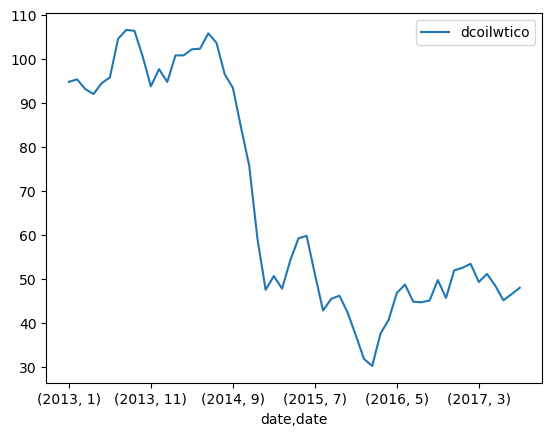

In [99]:
oil.groupby([oil['date'].dt.year, oil['date'].dt.month]).agg({'dcoilwtico': 'mean'}).plot()

<Axes: xlabel='date'>

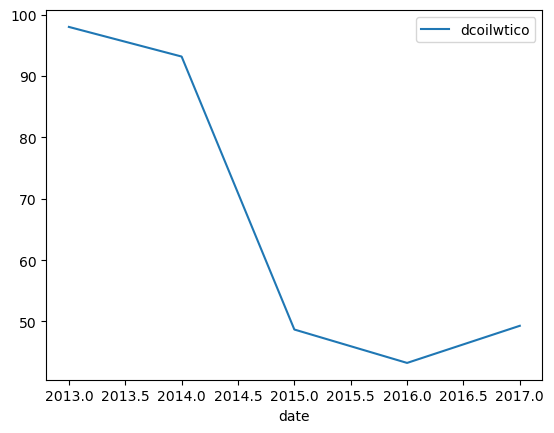

In [100]:
oil.groupby(oil['date'].dt.year).agg({'dcoilwtico': 'mean'}).plot()

<Axes: xlabel='date'>

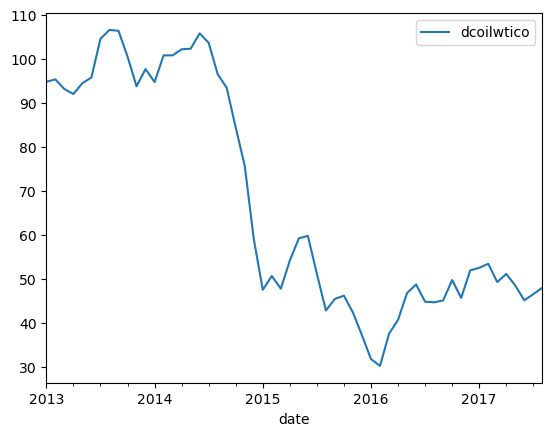

In [102]:
oil.set_index('date').resample('M').mean().plot()

<Axes: xlabel='date'>

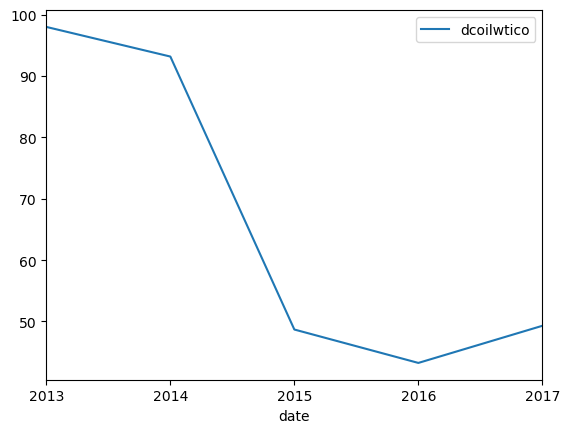

In [103]:
oil.set_index('date').resample('Y').mean().plot()

# Assignment 6: Rolling Averages

Plot the 90-day moving average for transactions for store 47.

This will help remove some of the noise from our series.

Thanks!


In [104]:
# recreate transactions_47 with date as index 

transactions_47 = (transactions
                   .loc[transactions["store_nbr"]==47, ["date", "transactions"]]
                   .set_index("date"))

transactions_47.head()

,transactions
date,
2013-01-02,4161
2013-01-03,3660
2013-01-04,3915
2013-01-05,4764
2013-01-06,4935


<Axes: xlabel='date'>

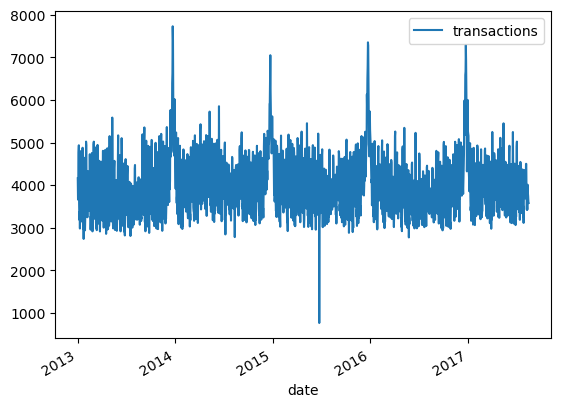

In [105]:
# original daily series for comparison

transactions_47.plot()

<Axes: xlabel='date'>

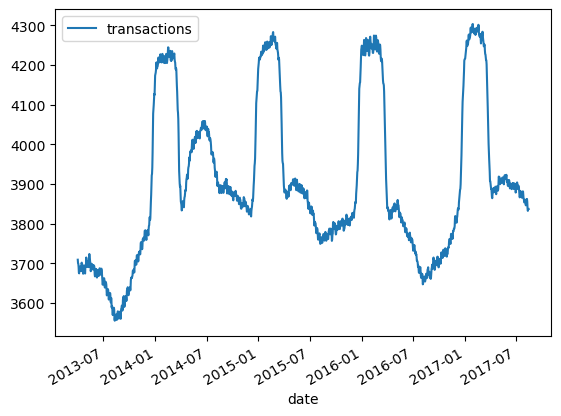

In [110]:
transactions_47.rolling(90).mean().plot()